In [3]:
from matplotlib import pyplot as plt
import torch
import numpy as np
from scipy import stats
import math
from typing import List, Tuple, Any

In [2]:
# Loading the arrays back
Distances = np.load('Distances_self_norm.npy', allow_pickle=True)
#Cos_distances = np.load('Cos_distances.npy', allow_pickle=True)
Norms = np.load('Norms_self_norm.npy', allow_pickle=True)


In [ ]:
# Running the scripts
%run "c:/Users/Win10/Desktop/Magistrale/Tirocinio AI-Lab/STL_explainability/Test_distance_local_matrix.py"

# Runs in 1h if the parameters lists are all of len 10

## Effect of the different parameters used on the kernels
The three parameters considered are:
1) The number of trajectories used
2) The number of formulae used (in particoular the number of forulae minus the number of trajectories)
3) The standard deviation of the distribution around the local trajectory

The euclidean and cosine distance between two types of kernels are measured:
1) Local kernels obtained by sampling around a local trajectory
2) Kernels transformed using importance sampling (starting from global distribution)

After that, the norms of the local, global and importance sampling kernels are measured with respect to the previous parameters

In [4]:
def plot_regression(data_array: np.ndarray,
                          parameter_index: int, 
                          var_index: int, 
                          ax: plt.Axes, 
                          title: str, 
                          colors: List[str]) -> Tuple[float, float, float]:
    """
    Plot individual datasets and perform regression.
    
    Args:
        data_array (np.ndarray): 3D array of data
        parameter_index (int): index of the parameter used on the x axis
        var_index (int): Index of the variable to plot
        ax (plt.Axes): Matplotlib axes to plot on
        title (str): Title for the plot
        colors (List[str]): List of colors for plotting
    
    Returns:
        Tuple of slope, intercept, and R-squared
    """

    # Store all points for combined regression
    x_points = []
    y_points = []

    #Easy way to print a single value of x, y:
    Print_now = True

    # Different for loops depending on the parameter_index
    match parameter_index:
        case 0: # potting against the number of added formulae
            for idx2 in range(data_array.shape[1]):
                for idx3 in range(data_array.shape[2]):

                    # Creating the lists of points for the plot
                    #x = [data_array[idx1, idx2, idx3][parameter_index] for idx1 in range(data_array.shape[parameter_index])]
                    #y = [data_array[idx1, idx2, idx3][var_index] for idx1 in range(data_array.shape[parameter_index])]
                    x = []
                    y = []
                    for idx1 in range(data_array.shape[parameter_index]):
                        if not  math.isnan(data_array[idx1, idx2, idx3][var_index]):
                            x.append(data_array[idx1, idx2, idx3][parameter_index])
                            y.append(data_array[idx1, idx2, idx3][var_index])
                    
                    if Print_now:
                        Print_now = False
                        print(f"x = {x}")
                        print(f"y = {y}")
                        print("\n")

                    ax.scatter(x, y, 
                            color=colors[idx2],
                            alpha=0.3,
                            s=5)
                    
                    # Collect points for combined regression
                    x_points.extend(x)
                    y_points.extend(y)

        case 1: # plotting against the number of trajectories
            for idx1 in range(data_array.shape[0]):
                for idx3 in range(data_array.shape[2]):

                    # Creating the lists of points for the plot
                    #x = [data_array[idx1, idx2, idx3][parameter_index] for idx2 in range(data_array.shape[parameter_index])]
                    #y = [data_array[idx1, idx2, idx3][var_index] for idx2 in range(data_array.shape[parameter_index])]
                    
                    x = []
                    y = []

                    for idx2 in range(data_array.shape[parameter_index]):
                        if not math.isnan(data_array[idx1, idx2, idx3][var_index]):
                            x.append(data_array[idx1, idx2, idx3][parameter_index])
                            y.append(data_array[idx1, idx2, idx3][var_index])


                    ax.scatter(x, y, 
                            color=colors[idx1], 
                            alpha=0.3, 
                            s=5)
                    
                    # Collect points for combined regression
                    x_points.extend(x)
                    y_points.extend(y)

        case 2: # plotting against the standard deviation
            for idx1 in range(data_array.shape[0]):
                for idx2 in range(data_array.shape[1]):

                    # Creating the lists of points for the plot
                    #x = [data_array[idx1, idx2, idx3][parameter_index] for idx3 in range(data_array.shape[2])]
                    #y = [data_array[idx1, idx2, idx3][var_index] for idx3 in range(data_array.shape[2])]
                    x = []
                    y = []
                    for idx3 in range(data_array.shape[2]):
                        if not math.isnan(data_array[idx1, idx2, idx3][var_index]):
                            x.append(data_array[idx1, idx2, idx3][parameter_index])
                            y.append(data_array[idx1, idx2, idx3][var_index])



                    ax.scatter(x, y, 
                            color=colors[idx2],
                            alpha=0.3,
                            s=5)
                    
                    # Collect points for combined regression
                    x_points.extend(x)
                    y_points.extend(y)
    
    # Convert to numpy arrays for regression
    x_array = np.array(x_points)
    y_array = np.array(y_points)

    # Testing that no value is NaN
    if np.isnan(np.sum(y_array)):
        raise ValueError("NAN VALUE FOUND!!!")

    
    # Linear regression
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_array, y_array)
    
    # Regression line
    line_x = np.array([x_array.min(), x_array.max()]).reshape(-1, 1)
    line_y = slope * line_x + intercept
    
    ax.plot(line_x, line_y, color='black', 
            linestyle='--', 
            linewidth=3,
            label=f'Combined Regression (y = {slope:.4f}x + {intercept:.4f})')
    
    # Customize plot
    xlabels = ['formulae added', 'trajectories', 'local standard deviation']
    ax.set_title(title, fontsize=13)
    ax.set_xlabel(xlabels[parameter_index], fontsize=12)
    ax.set_ylabel('Value', fontsize=12)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)
    
    return slope, intercept, r_value**2




def plotter(data: np.ndarray,
            parameter_index: int, 
            variable: str):
    """
    Create a comprehensive plot of different norms.
    
    Args:
        data (np.ndarray): 3D array containing the data
        parameter_index (int): index of the parameter used on the x axis
        variable (str): selects the plotting of the distances or the norms

    """
    # Colors for plotting
    colors = ['red', 'blue', 'green', 'purple', 'orange', 
              'teal', 'magenta', 'brown', 'olive', 'navy', 
              'coral', 'gold', 'indigo', 'lime', 'maroon']

    # Create figure and axes and various configurations for the plot
    xlabels = ['number of formulae added', 'number of trajectories', 'local standard deviation']
    if variable == "Distances":
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        configs = [
            (3, ax1, f'Effect of the {xlabels[parameter_index]} on the distance'), 
            (4, ax2, f'Effect of the {xlabels[parameter_index]} on the cos distance')
        ]
    elif variable == "Norms":
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 15))
        configs = [
            (3, ax1, f'Effect of the {xlabels[parameter_index]} on the global norm'),
            (4, ax2, f'Effect of the {xlabels[parameter_index]} on the local norm'),
            (5, ax3, f'Effect of the {xlabels[parameter_index]} on the importance sampling norm')
        ]

    # Plot each norm type
    regression_results = []
    for var_index, ax, title in configs:
        result = plot_regression(data, parameter_index, var_index, ax, title, colors)
        regression_results.append(result)
    
    # Print regression details
    labels = ['global', 'local', 'imp']
    for label, (slope, intercept, r_squared) in zip(labels, regression_results):
        print(f"Regression Equation norm_{label}: y = {slope}x + {intercept}")
        print(f"R² Score: {r_squared:.4f}")
    
    plt.tight_layout()
    plt.show()


Regression Equation norm_global: y = 5.014800058662397e-06x + 0.22009750240567055
R² Score: 0.0003
Regression Equation norm_local: y = 4.335073557766999e-05x + 0.16954443991184237
R² Score: 0.0016


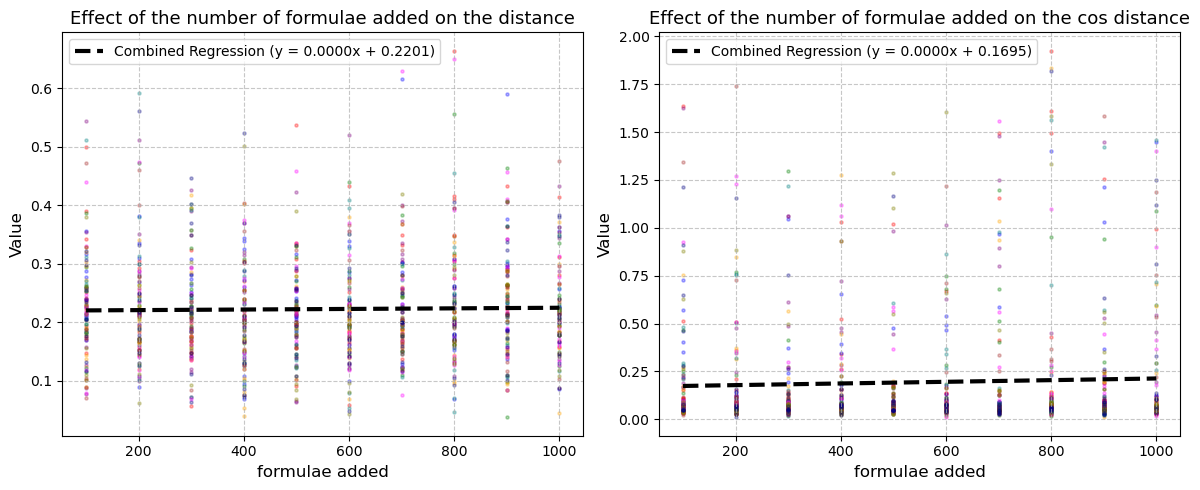

Regression Equation norm_global: y = -3.303766712628449e-05x + 0.24102635935739133
R² Score: 0.0109
Regression Equation norm_local: y = -3.511416931782873e-05x + 0.21270013760436665
R² Score: 0.0010


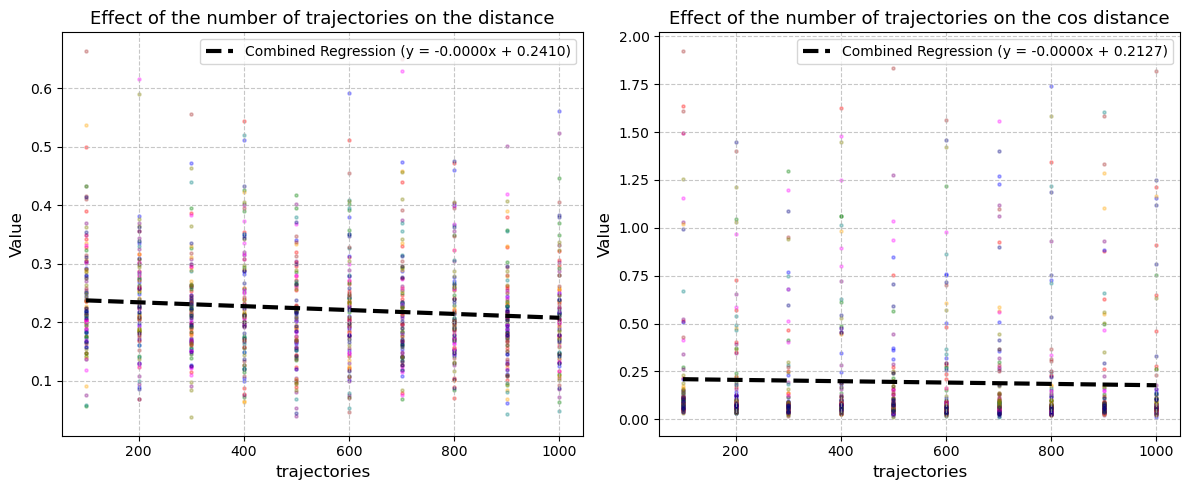

Regression Equation norm_global: y = 0.1034859082102775x + 0.14524121128022677
R² Score: 0.0325
Regression Equation norm_local: y = 0.0849993276596069x + 0.1296378487348557
R² Score: 0.0018


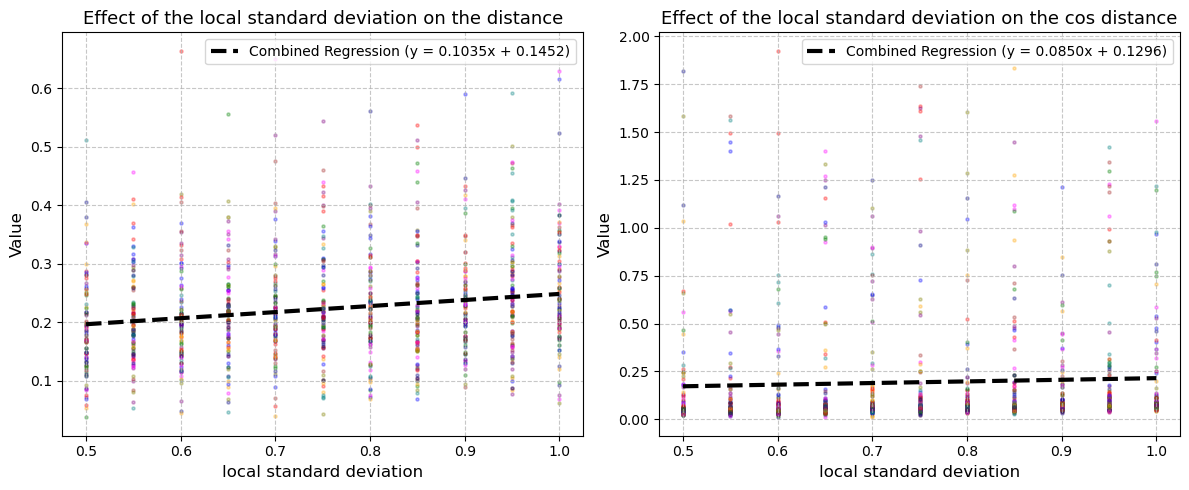

Regression Equation norm_global: y = 1.857395217889924e-05x + 0.2852347457770145
R² Score: 0.0027
Regression Equation norm_local: y = 2.8141520233932607e-05x + 0.3910250820625912
R² Score: 0.0021
Regression Equation norm_imp: y = 1.8251442498740454e-05x + 0.4508905712266763
R² Score: 0.0006


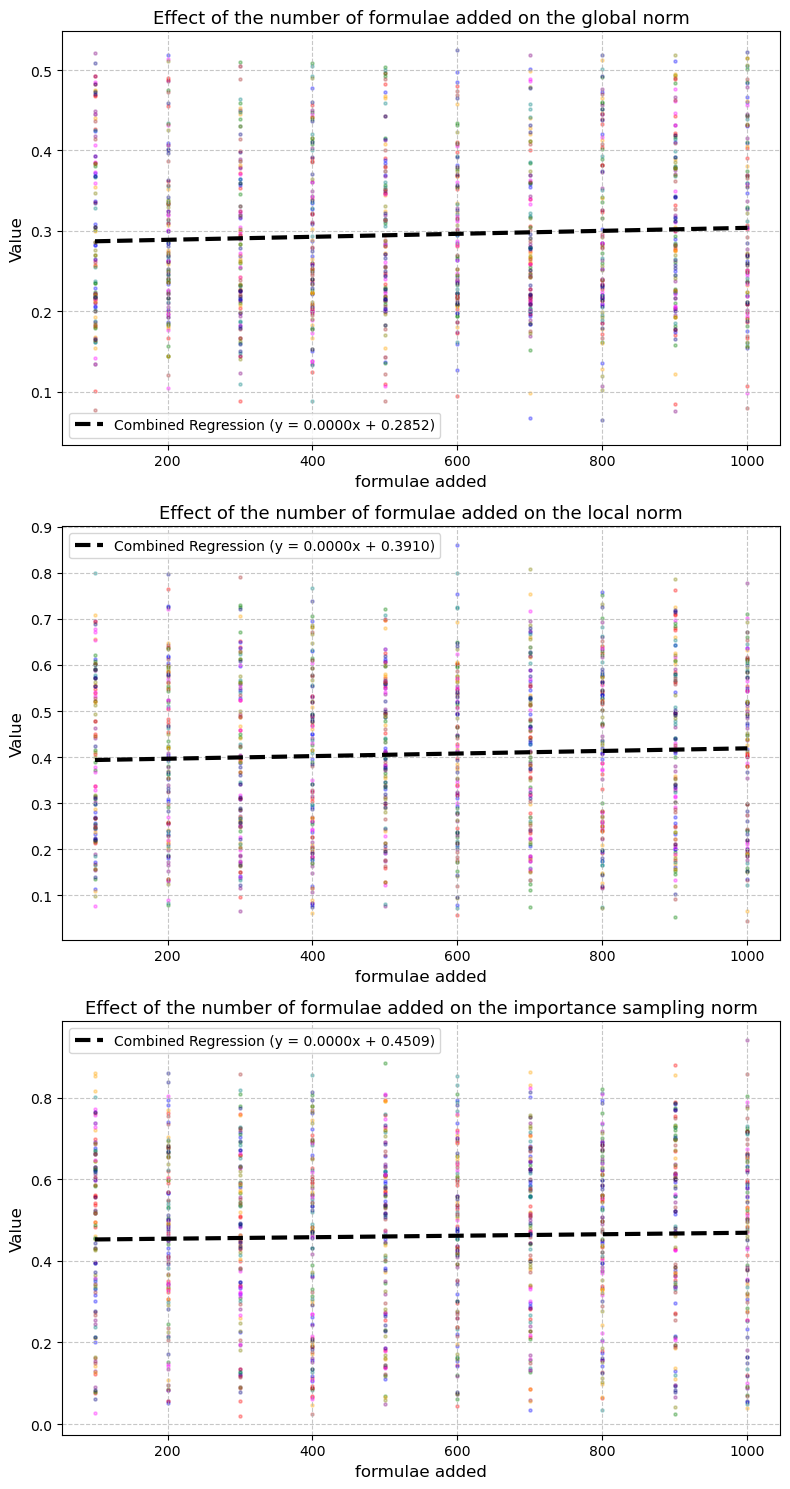

Regression Equation norm_global: y = -5.450600408243419e-06x + 0.298448249699943
R² Score: 0.0002
Regression Equation norm_local: y = -2.3103507856527973e-06x + 0.40777361112336313
R² Score: 0.0000
Regression Equation norm_imp: y = -3.310114005708825e-06x + 0.4627494273041234
R² Score: 0.0000


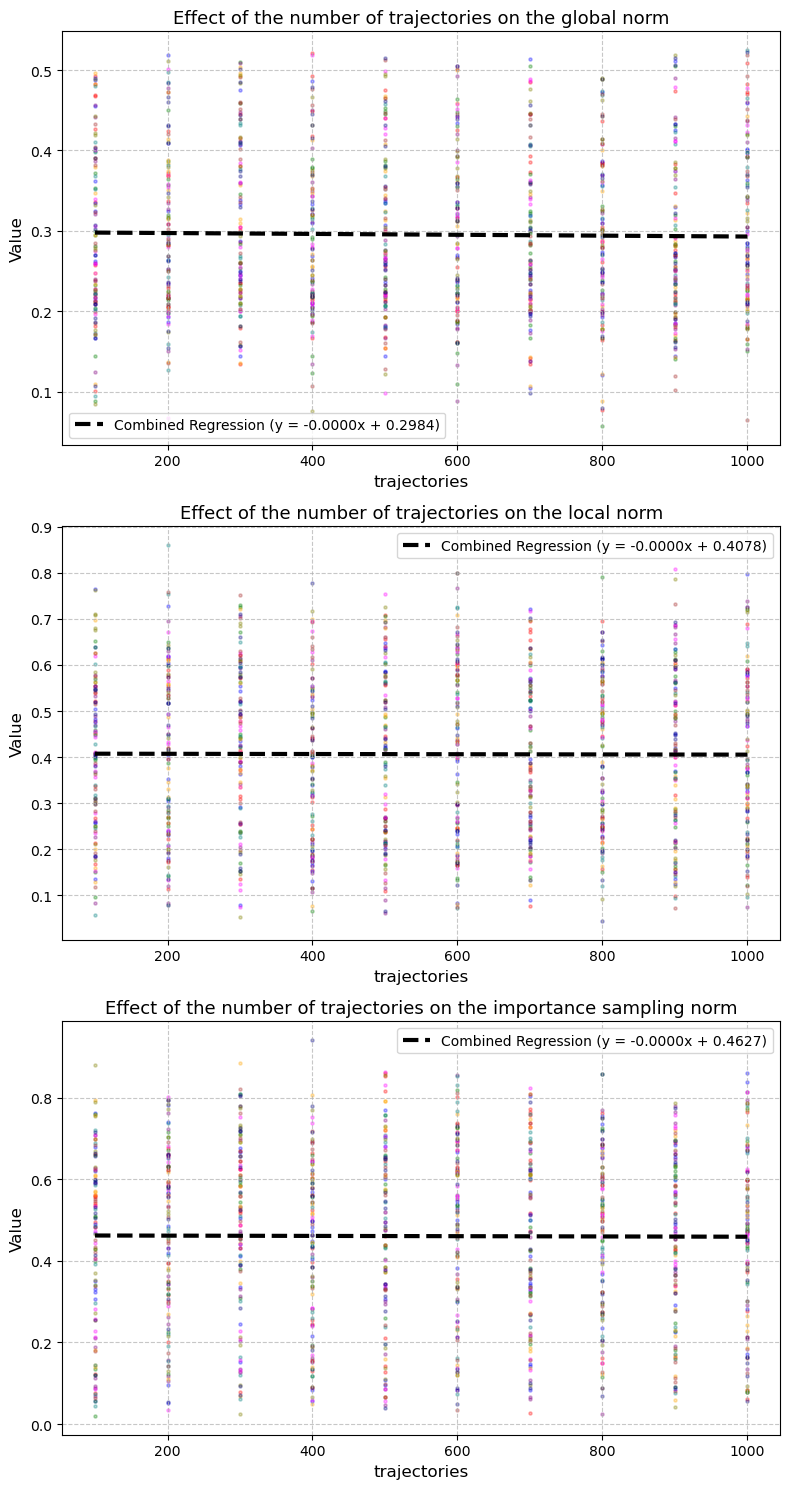

Regression Equation norm_global: y = 0.005571744482625625x + 0.2912716111134399
R² Score: 0.0001
Regression Equation norm_local: y = -0.08629658486355433x + 0.47122535683891986
R² Score: 0.0059
Regression Equation norm_imp: y = -0.04792535268786279x + 0.4968728791168806
R² Score: 0.0013


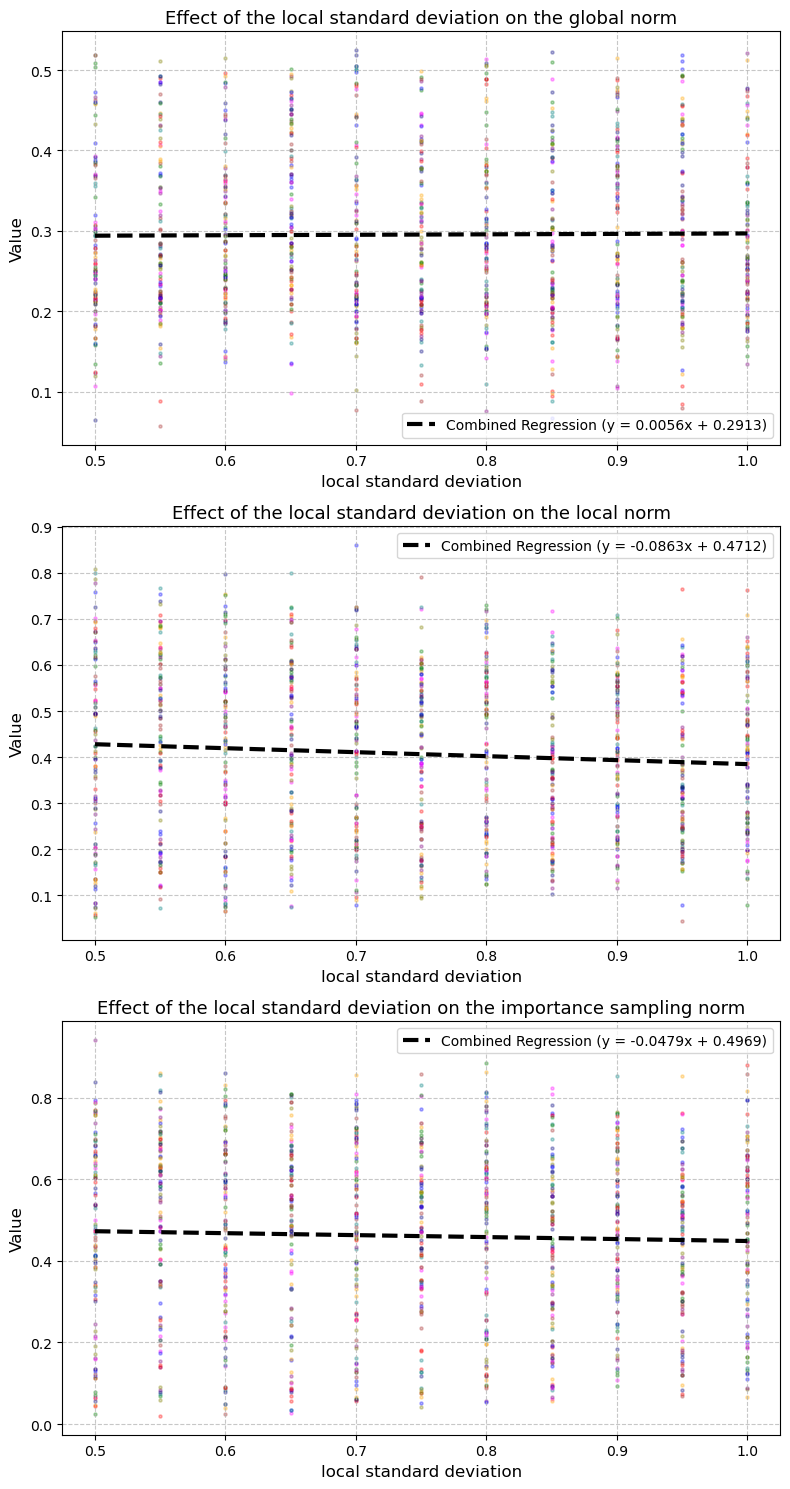

In [15]:
# Running the functions
for i in range(3):
    plotter(Distances, parameter_index=i, variable="Distances")
for i in range(3):
    plotter(Norms, parameter_index=i, variable="Norms")


# Conclusions:
1) The three parameters have a limited effect on the distances between the two kernels, but some small effects can be noted:
    * The number of formulae can increase the distance between local and imp kernels (probably because the number of formulae determines the size of the vector space of the kernels)
    * The number of trajectories decreases the distance between the two kernels (as suggested by the fact that they should converge in probability)
    * A low value of the standard deviation of the local distribution creates kernels that are closer to each other (notably a low standard deviation reduces the distance but doesn't reduce much the cosine distance)

2) If we consider the norms of the kernel we can note the following effects:
    * The number of formulae slightly increase the norm of the kernels (probably for the same reason, since the kernels will be in a higher dimensional space)
    * The number of trajectories doesn't change significally the norm of the kernels
    * A high value of standard deviation slightly reduces the norm of the kernels

In [13]:
# Running the scripts without the self normalizide weights
%run "c:/Users/Win10/Desktop/Magistrale/Tirocinio AI-Lab/STL_explainability/Test_distance_local_matrix.py"


KeyboardInterrupt: 

In [18]:
# Loading the new arrays back
Distances_basic = np.load('Distances_basic.npy', allow_pickle=True)
Norms_basic = np.load('Norms_basic.npy', allow_pickle=True)

Regression Equation norm_global: y = -1.7759477361503052e-05x + 0.40945214171752786
R² Score: 0.0008
Regression Equation norm_local: y = 5.44513326702696e-05x + 0.16719673732916512
R² Score: 0.0026


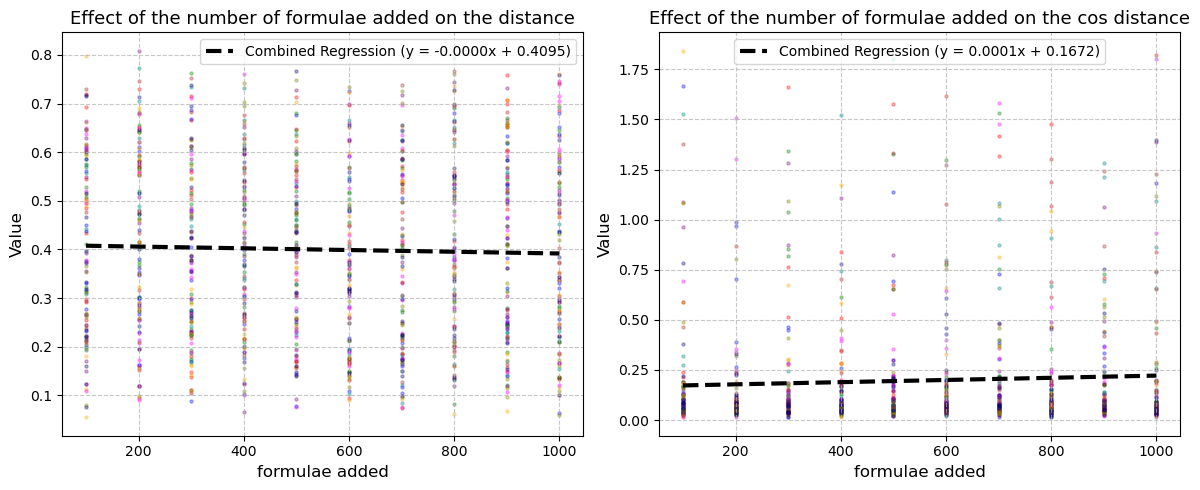

Regression Equation norm_global: y = 8.980833178709363e-06x + 0.3947450007227334
R² Score: 0.0002
Regression Equation norm_local: y = -5.8288262632595937e-05x + 0.2292035147457412
R² Score: 0.0030


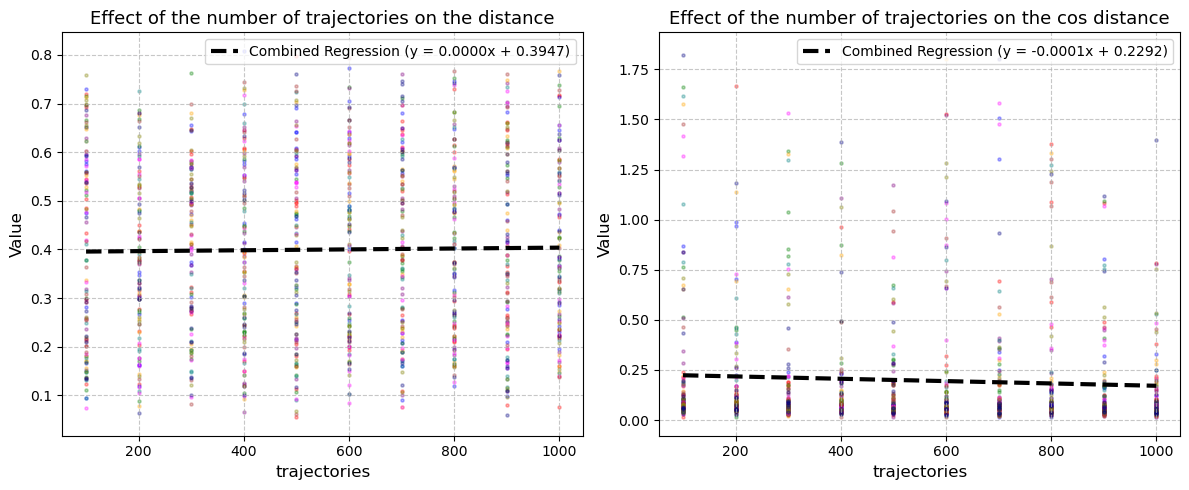

Regression Equation norm_global: y = -0.02331402274695309x + 0.417169946228916
R² Score: 0.0004
Regression Equation norm_local: y = 0.0571544394709847x + 0.1542791406945749
R² Score: 0.0009


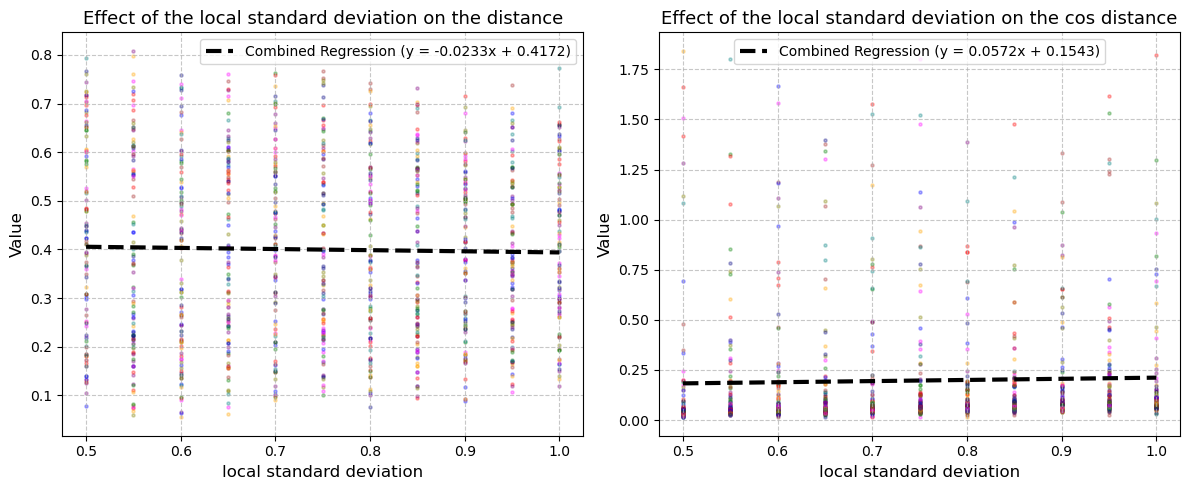

Regression Equation norm_global: y = 6.983757285868174e-07x + 0.2968136456292687
R² Score: 0.0000
Regression Equation norm_local: y = -1.7760066293980487e-05x + 0.40945609316229825
R² Score: 0.0008
Regression Equation norm_imp: y = -8.224552772236454e-10x + 4.446680939250314e-06
R² Score: 0.0001


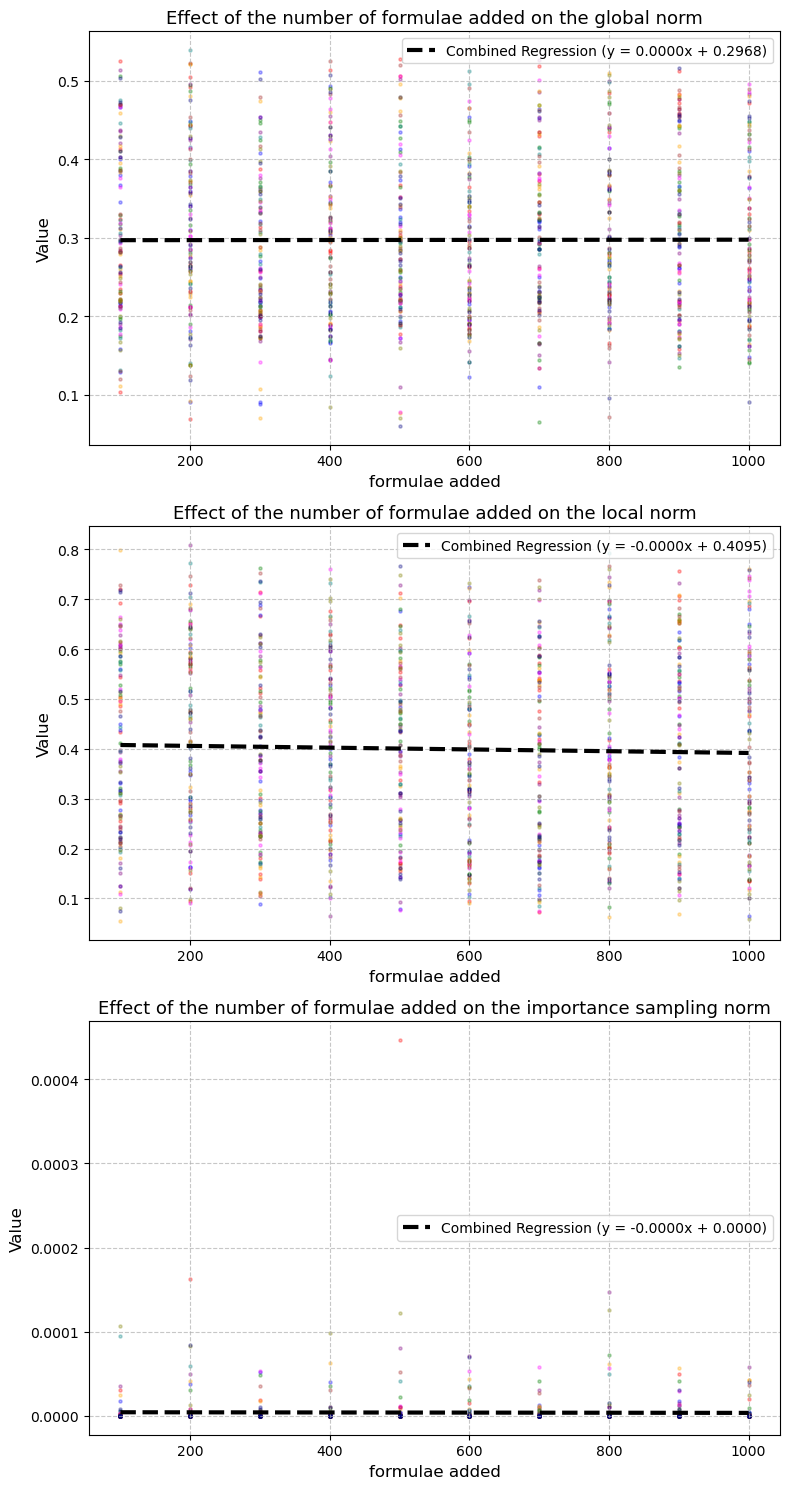

Regression Equation norm_global: y = -8.841285959255541e-07x + 0.2976840230077505
R² Score: 0.0000
Regression Equation norm_local: y = 8.97960961275522e-06x + 0.3947492714135936
R² Score: 0.0002
Regression Equation norm_imp: y = -1.4025234353849917e-09x + 4.765718426239054e-06
R² Score: 0.0004


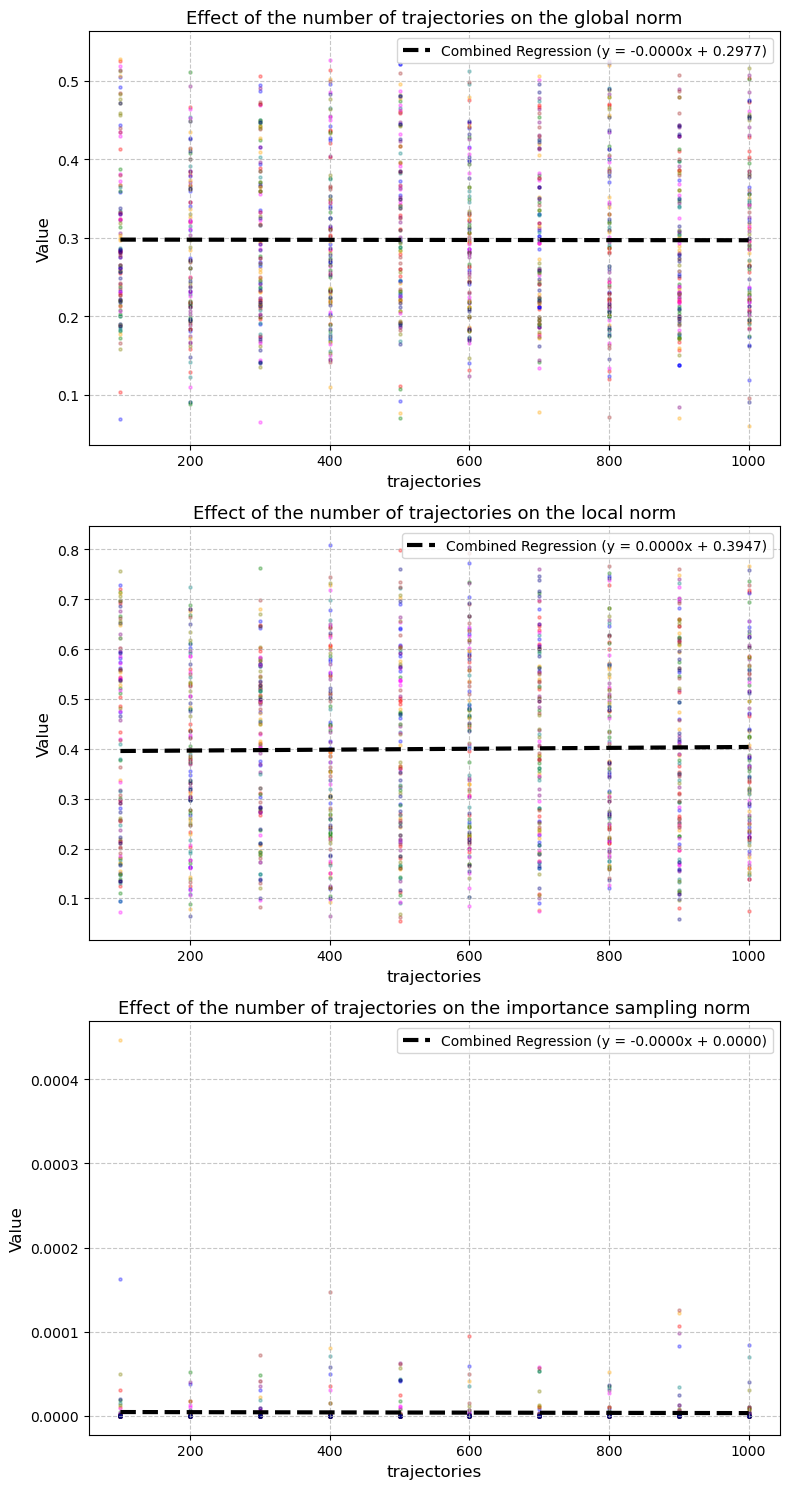

Regression Equation norm_global: y = 0.04788421949202364x + 0.26128458766097373
R² Score: 0.0054
Regression Equation norm_local: y = -0.02334907239133662x + 0.41719986099411144
R² Score: 0.0004
Regression Equation norm_imp: y = -3.8558486837722e-05x + 3.29131956650688e-05
R² Score: 0.0988


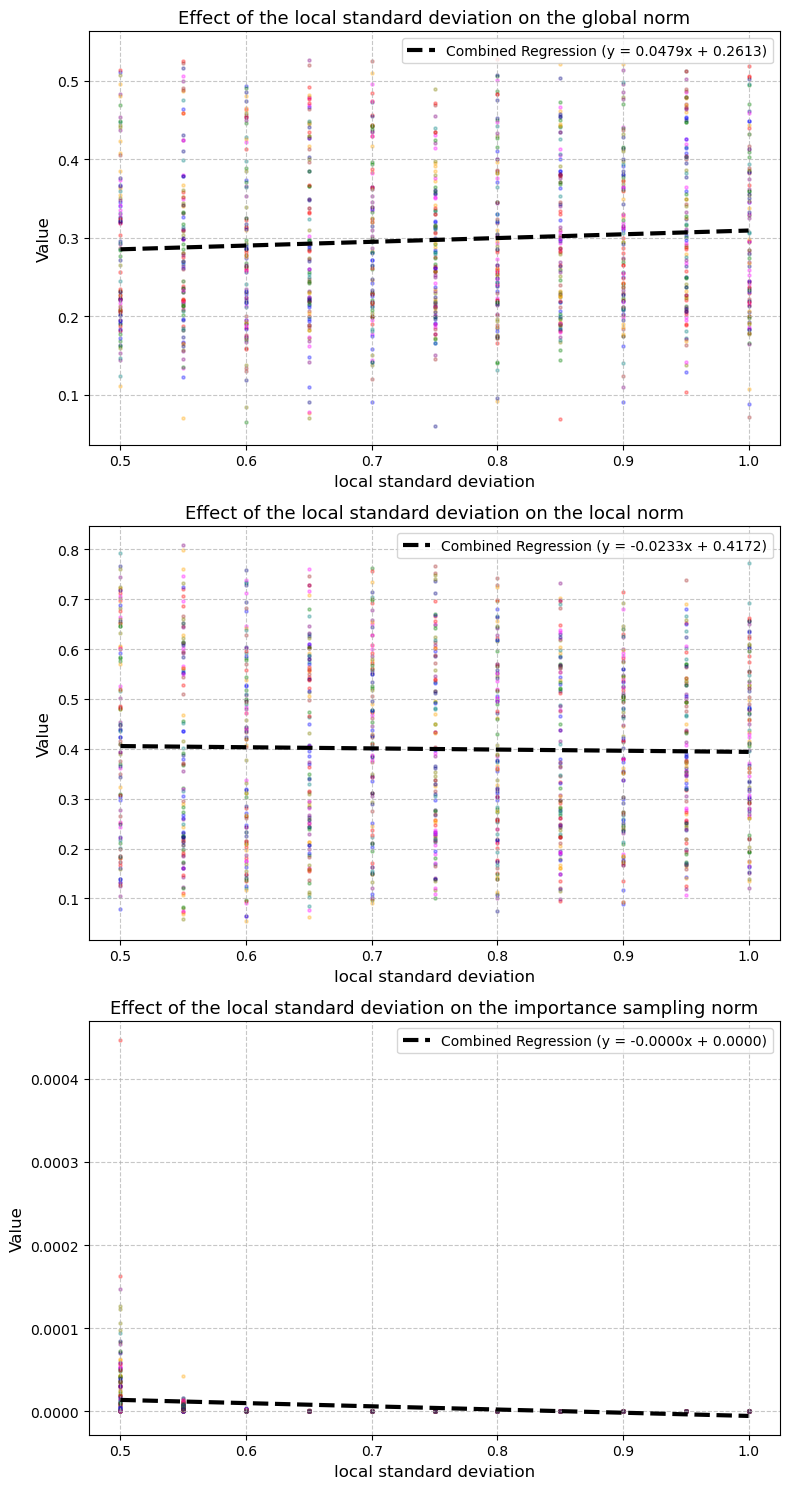

In [19]:
# Running the functions
for i in range(3):
    plotter(Distances_basic, parameter_index=i, variable="Distances")
for i in range(3):
    plotter(Norms_basic, parameter_index=i, variable="Norms")


In [12]:
# Loading the new arrays back
Distances_new = np.load('Distances_new.npy', allow_pickle=True)
Norms_new = np.load('Norms_new.npy', allow_pickle=True)

In [22]:
#Changing the data array to not have torch values
for idx1 in range(Distances_new.shape[0]):
    for idx2 in range(Distances_new.shape[1]):
        for idx3 in range(Distances_new.shape[2]):
            if isinstance(Distances_new[idx1, idx2, idx3][3], torch.Tensor):
                print(f"Changed {Distances_new[idx1, idx2, idx3][3]}")
                a,b,c,d,e = Distances_new[idx1, idx2, idx3]
                Distances_new[idx1, idx2, idx3] = (a,b,c,Distances_new[idx1, idx2, idx3][3].item(),e)
            if isinstance(Distances_new[idx1, idx2, idx3][4], torch.Tensor):
                a,b,c,d,e = Distances_new[idx1, idx2, idx3]
                print(f"Changed {Distances_new[idx1, idx2, idx3][4]}")
                Distances_new[idx1, idx2, idx3] = (a,b,c,d,Distances_new[idx1, idx2, idx3][4].item())

for idx1 in range(Norms_new.shape[0]):
    for idx2 in range(Norms_new.shape[1]):
        for idx3 in range(Norms_new.shape[2]):
            if isinstance(Norms_new[idx1, idx2, idx3][3], torch.Tensor):
                print(f"Changed {Norms_new[idx1, idx2, idx3][3]}")
                Norms_new[idx1, idx2, idx3][3] = Norms_new[idx1, idx2, idx3][3].item()
            if isinstance(Norms_new[idx1, idx2, idx3][4], torch.Tensor):
                print(f"Changed {Norms_new[idx1, idx2, idx3][4]}")
                Norms_new[idx1, idx2, idx3][4] = Norms_new[idx1, idx2, idx3][4].item()
            if isinstance(Norms_new[idx1, idx2, idx3][5], torch.Tensor):
                print(f"Changed {Norms_new[idx1, idx2, idx3][5]}")
                Norms_new[idx1, idx2, idx3][5] = Norms_new[idx1, idx2, idx3][5].item()

Changed 0.6999404430389404
Changed 0.46271783113479614
Changed 0.7981078624725342
Changed 1.0880792140960693
Changed 0.7631550431251526
Changed 0.5148192048072815
Changed 0.24788695573806763
Changed 0.5233721733093262
Changed 0.6290557980537415
Changed 0.28954631090164185
Changed 0.36990267038345337
Changed 0.19415348768234253
Changed 0.3113690912723541
Changed 0.26053524017333984
Changed 0.4546525478363037
Changed 0.16370385885238647
Changed 0.31329959630966187
Changed 0.5306597948074341
Changed 0.5963637828826904
Changed 0.381805956363678
Changed 0.6101847290992737
Changed 0.7943894863128662
Changed 0.44536256790161133
Changed 0.12446451187133789
Changed 0.34268033504486084
Changed 1.165297269821167
Changed 0.39360591769218445
Changed 0.292758047580719
Changed 0.4829459488391876
Changed 1.5718531608581543
Changed 0.3804032802581787
Changed 1.5064724683761597
Changed 0.483363538980484
Changed 0.19532954692840576
Changed 0.4036533236503601
Changed 0.21317040920257568
Changed 0.85298979

x = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
y = [0.6999404430389404, 0.48337921500205994, 0.49705979228019714, 0.2559646666049957, 0.28808531165122986, 0.49865174293518066, 0.6611435413360596, 0.594815731048584, 0.4052487909793854, 0.2181871384382248]


x = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
y = [0.46271783113479614, 0.22445249557495117, 0.4180981516838074, 0.44560956954956055, 0.22845351696014404, 0.24583107233047485, 0.806540846824646, 0.38593393564224243, 0.5439096093177795, 0.1503002643585205]


Regression Equation norm_global: y = 2.0847405451287885e-05x + 0.4706821573068061
R² Score: 0.0011
Regression Equation norm_local: y = 5.582104933541872e-05x + 0.40984787361298675
R² Score: 0.0013


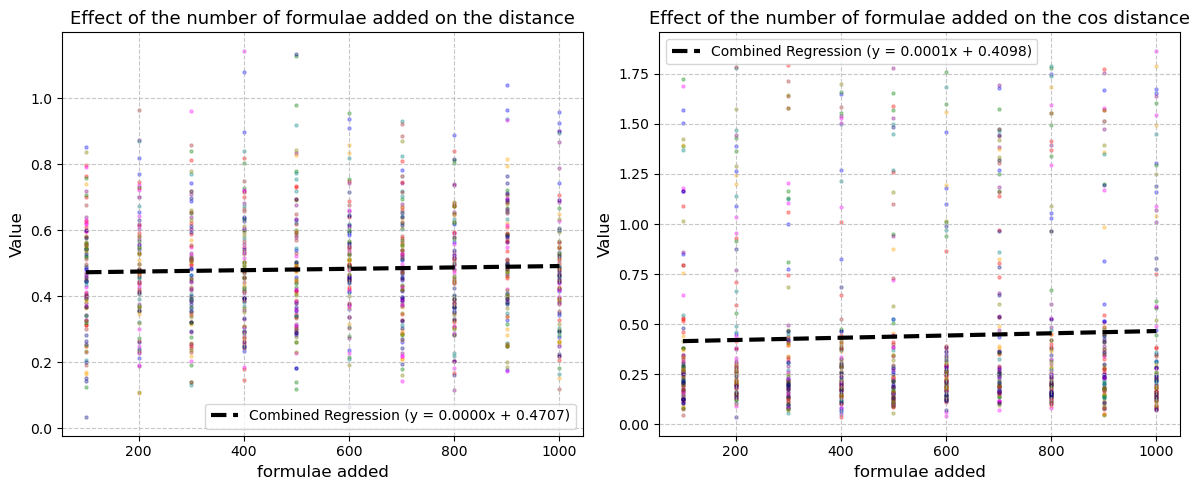

Regression Equation norm_global: y = -5.70797931596447e-05x + 0.5138212298096275
R² Score: 0.0084
Regression Equation norm_local: y = -0.00018226105376198005x + 0.5416738577233955
R² Score: 0.0133


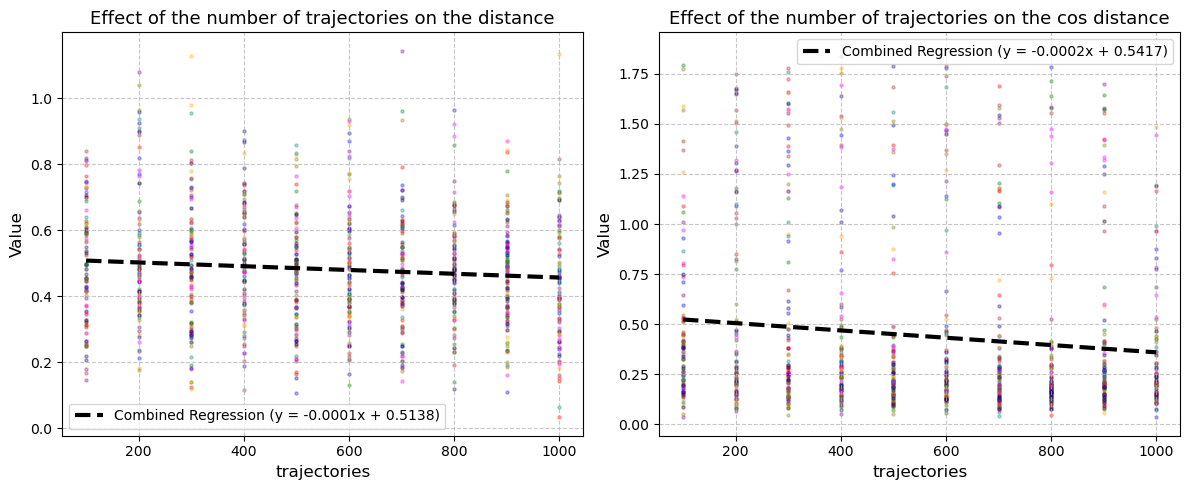

Regression Equation norm_global: y = 0.050650399468691015x + 0.44359718454771896
R² Score: 0.0020
Regression Equation norm_local: y = 0.03613683769255684x + 0.41308462444639066
R² Score: 0.0002


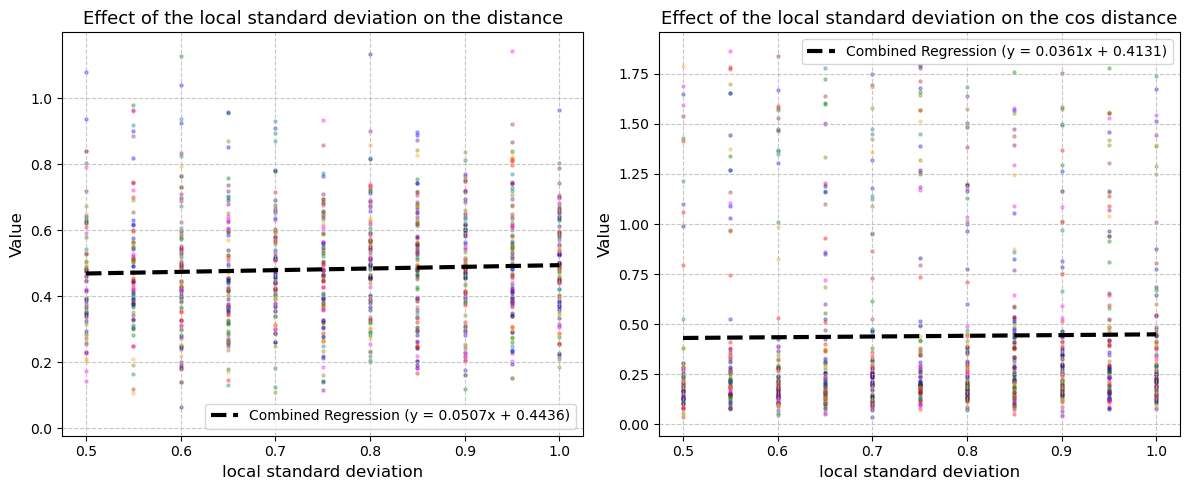

x = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
y = [0.32666951417922974, 0.33131271600723267, 0.1979925036430359, 0.26004740595817566, 0.29580777883529663, 0.30131736397743225, 0.19354157149791718, 0.29323333501815796, 0.23580050468444824, 0.25158751010894775]


x = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
y = [0.27692461013793945, 0.47146719694137573, 0.10749583691358566, 0.15430065989494324, 0.25245508551597595, 0.575951337814331, 0.2157861441373825, 0.41015374660491943, 0.26544442772865295, 0.39910924434661865]


x = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
y = [0.8086100220680237, 0.7465264201164246, 0.5518636703491211, 0.3069627583026886, 0.4339442551136017, 0.7593357563018799, 0.6680763363838196, 0.750874400138855, 0.45034313201904297, 0.39675888419151306]


Regression Equation norm_global: y = 2.487233504858225e-06x + 0.2967981330734311
R² Score: 0.0001
Regression Equation norm_local: y = 1.464963394625128e-05x + 0.40628905122930353
R² Score: 0.000

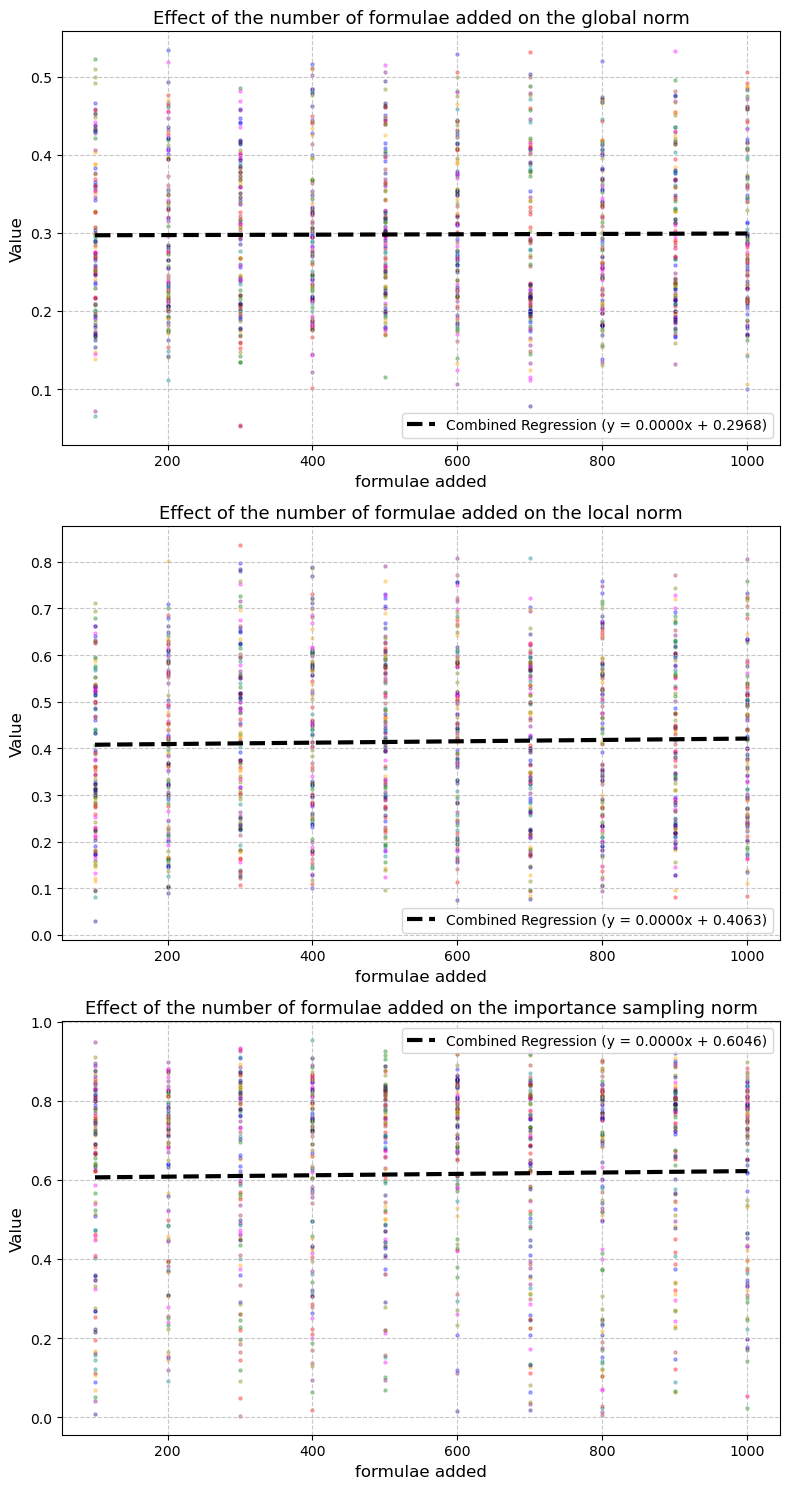

Regression Equation norm_global: y = -1.1542121255282843e-05x + 0.30451427819150867
R² Score: 0.0011
Regression Equation norm_local: y = 1.2822691244445188e-05x + 0.40729386971529685
R² Score: 0.0004
Regression Equation norm_imp: y = 2.8630724258495088e-05x + 0.5983903364384797
R² Score: 0.0011


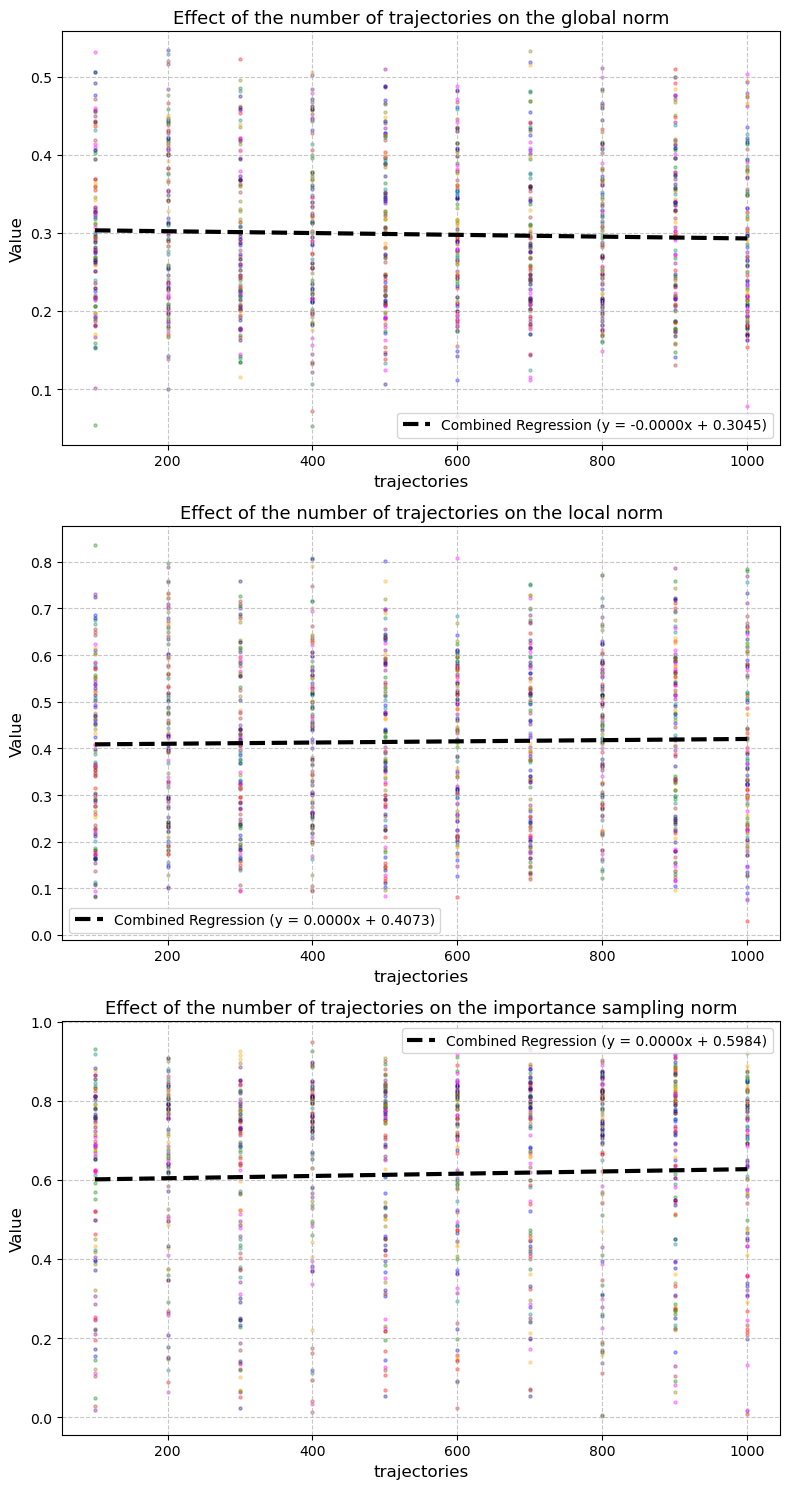

Regression Equation norm_global: y = -0.022394080500711084x + 0.31496167187663643
R² Score: 0.0013
Regression Equation norm_local: y = -0.12003375883129505x + 0.504371669023213
R² Score: 0.0116
Regression Equation norm_imp: y = -0.001588386830342364x + 0.615476695641567
R² Score: 0.0000


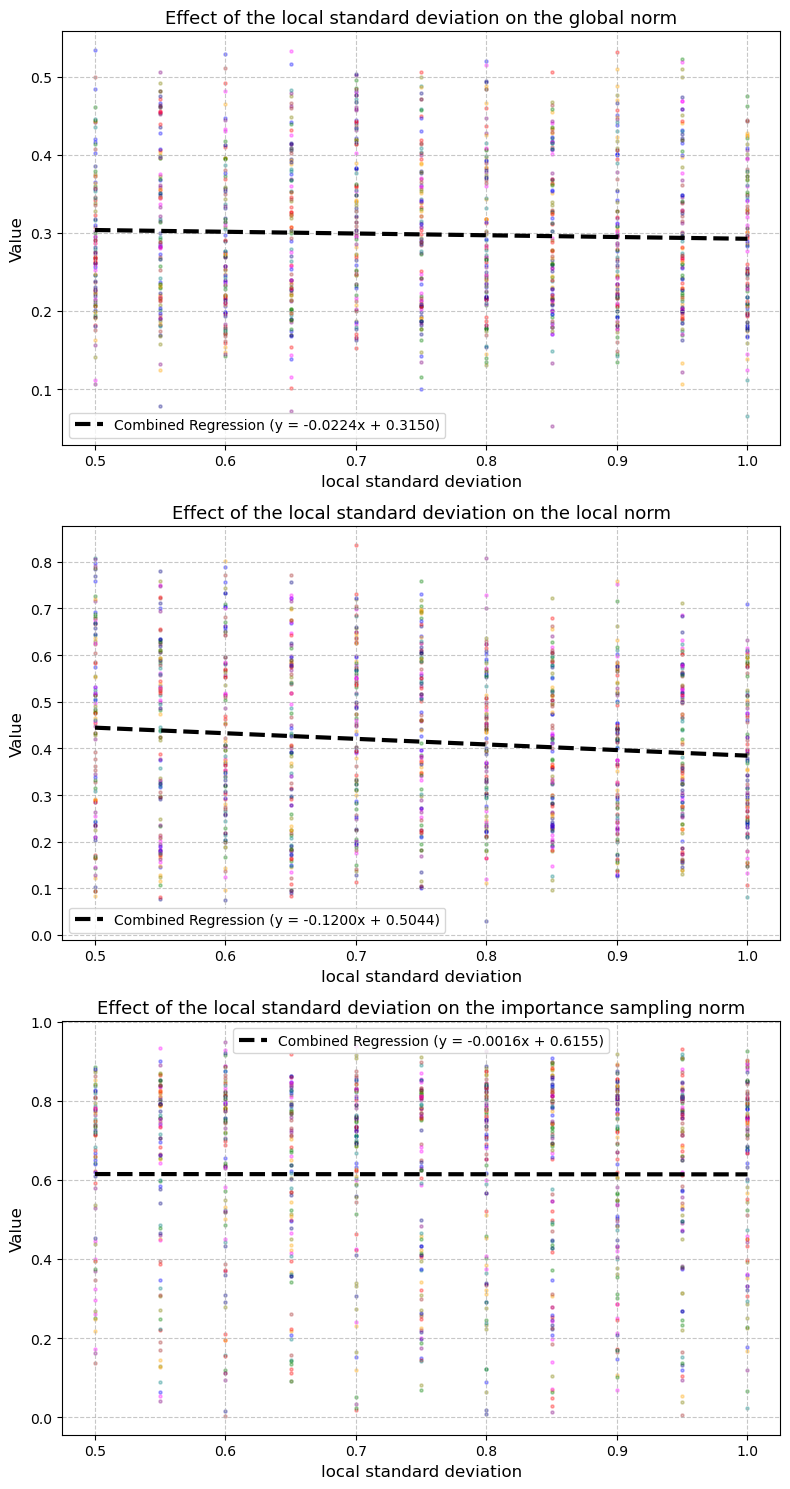

In [27]:
# Running the functions
for i in range(3):
    plotter(Distances_new, parameter_index=i, variable="Distances")
for i in range(3):
    plotter(Norms_new, parameter_index=i, variable="Norms")

In [13]:
# Loading the arrays
Distances_big = np.load('Distances_big_new.npy', allow_pickle=True)
Norms_big = np.load('Norms_big_new.npy', allow_pickle=True)

x = [100, 300, 500, 700]
y = [0.9162074327468872, 0.40653419494628906, 0.45627361536026, 0.5008076429367065]


x = [100, 300, 500, 700]
y = [1.3684123754501343, 0.15618956089019775, 0.2466951608657837, 0.21643543243408203]


Regression Equation norm_global: y = -5.9918983777364095e-05x + 0.5015945798158645
R² Score: 0.0047
Regression Equation norm_local: y = -0.00033545436263084414x + 0.5972233198086421
R² Score: 0.0331


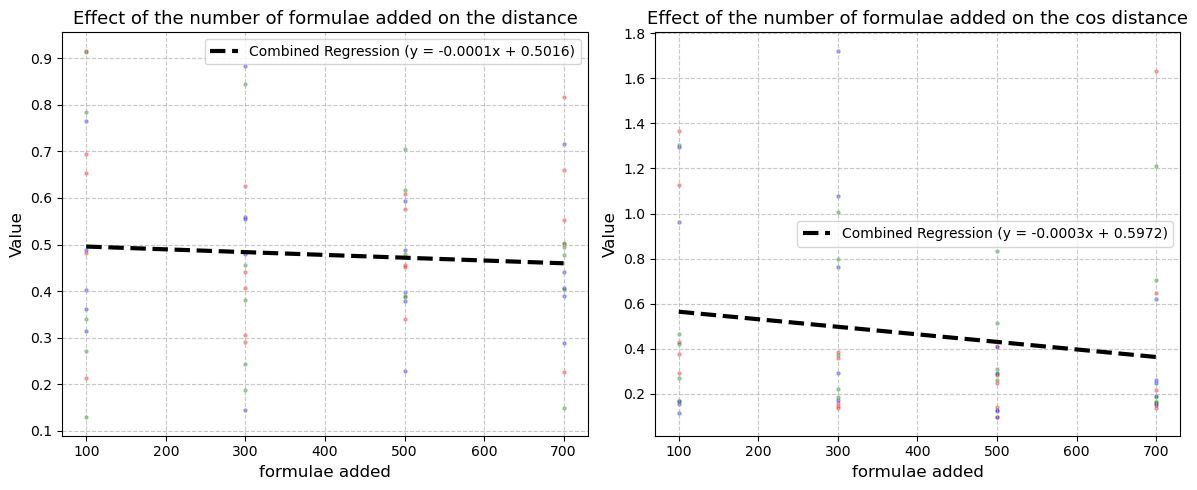

Regression Equation norm_global: y = -2.6645341515541077e-05x + 0.5575630108515421
R² Score: 0.0125
Regression Equation norm_local: y = 2.74956837296486e-05x + 0.38055452356735864
R² Score: 0.0030


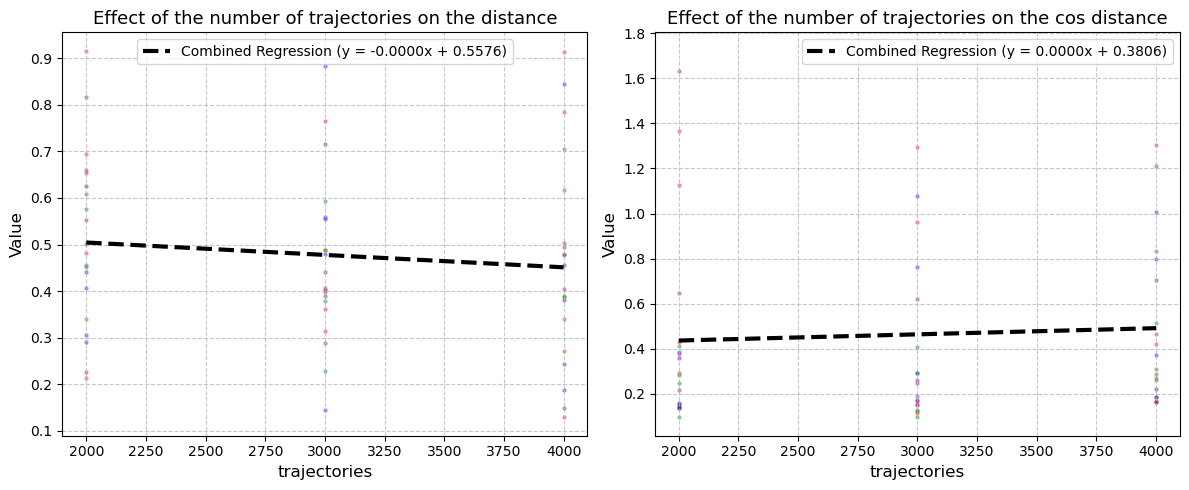

Regression Equation norm_global: y = 0.5768821338812508x + -0.04156693418820673
R² Score: 0.0440
Regression Equation norm_local: y = -0.5370049774646758x + 0.9463460544745126
R² Score: 0.0085


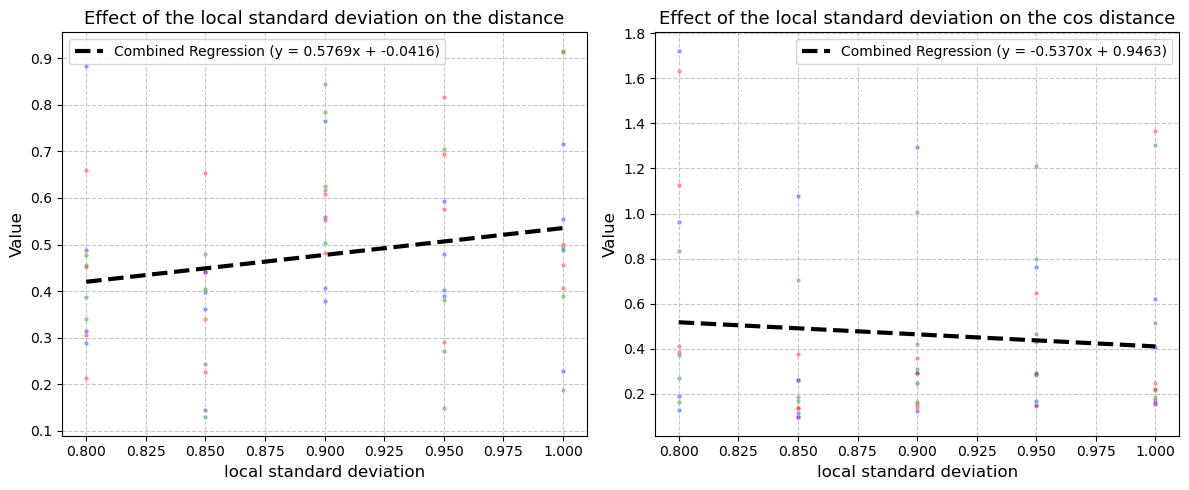

x = [100, 300, 500, 700]
y = [0.3198719620704651, 0.31864282488822937, 0.17342595756053925, 0.4804290533065796]


x = [100, 300, 500, 700]
y = [0.4543566107749939, 0.4587242007255554, 0.5329605340957642, 0.4769677221775055]


x = [100, 300, 500, 700]
y = [0.6456382274627686, 0.7106040120124817, 0.10937517136335373, 0.7774528861045837]


Regression Equation norm_global: y = -3.9891629417737346e-05x + 0.31354676097631456
R² Score: 0.0071
Regression Equation norm_local: y = 5.054083342353503e-05x + 0.36641057468950744
R² Score: 0.0042
Regression Equation norm_imp: y = 0.00011197101709743342x + 0.538828656586508
R² Score: 0.0084


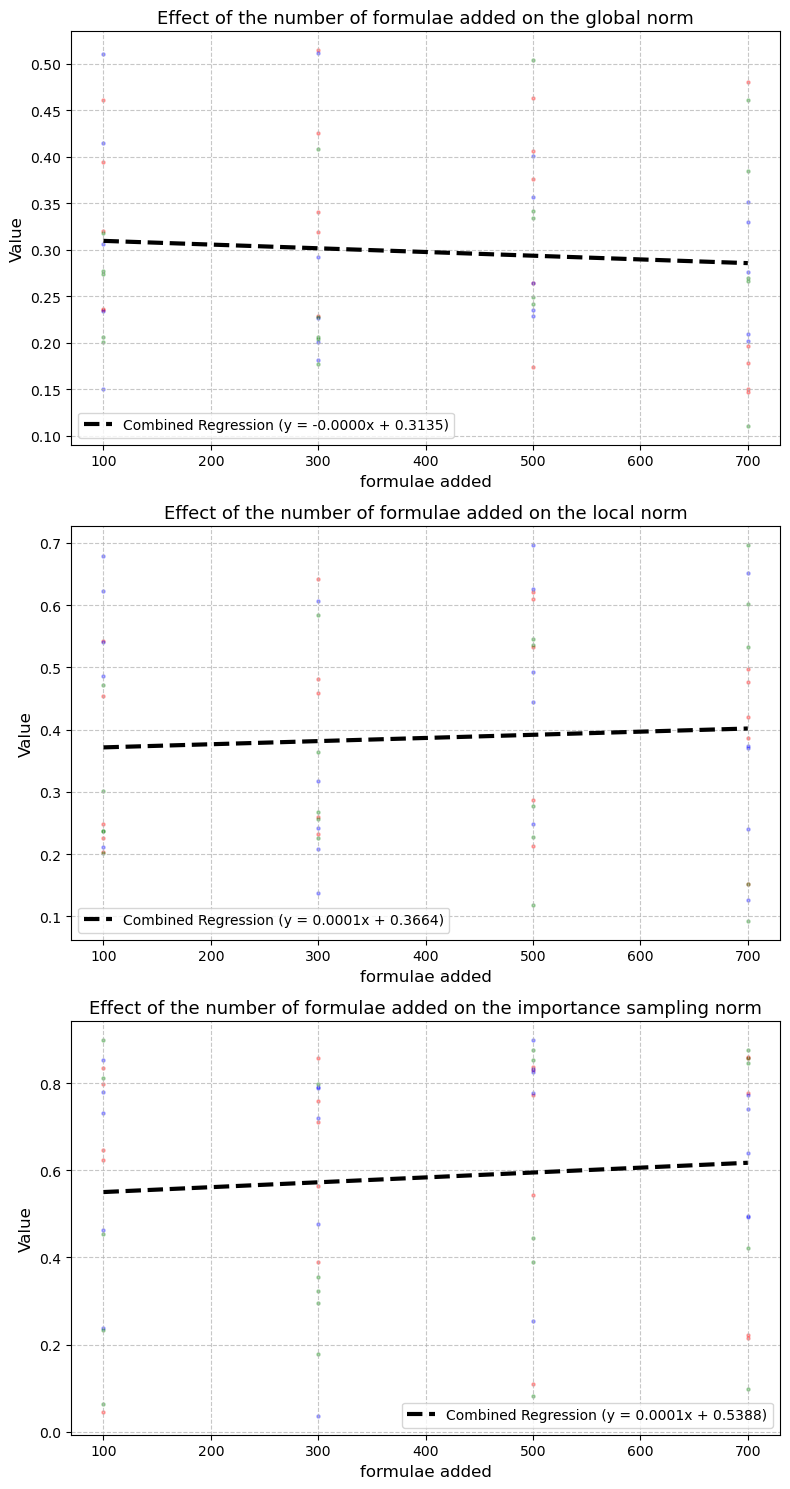

Regression Equation norm_global: y = -1.6085975244641306e-05x + 0.34584803494314353
R² Score: 0.0154
Regression Equation norm_local: y = -2.5415378995239736e-05x + 0.46287304504464066
R² Score: 0.0140
Regression Equation norm_imp: y = -5.2501548454165456e-05x + 0.7411217087879778
R² Score: 0.0247


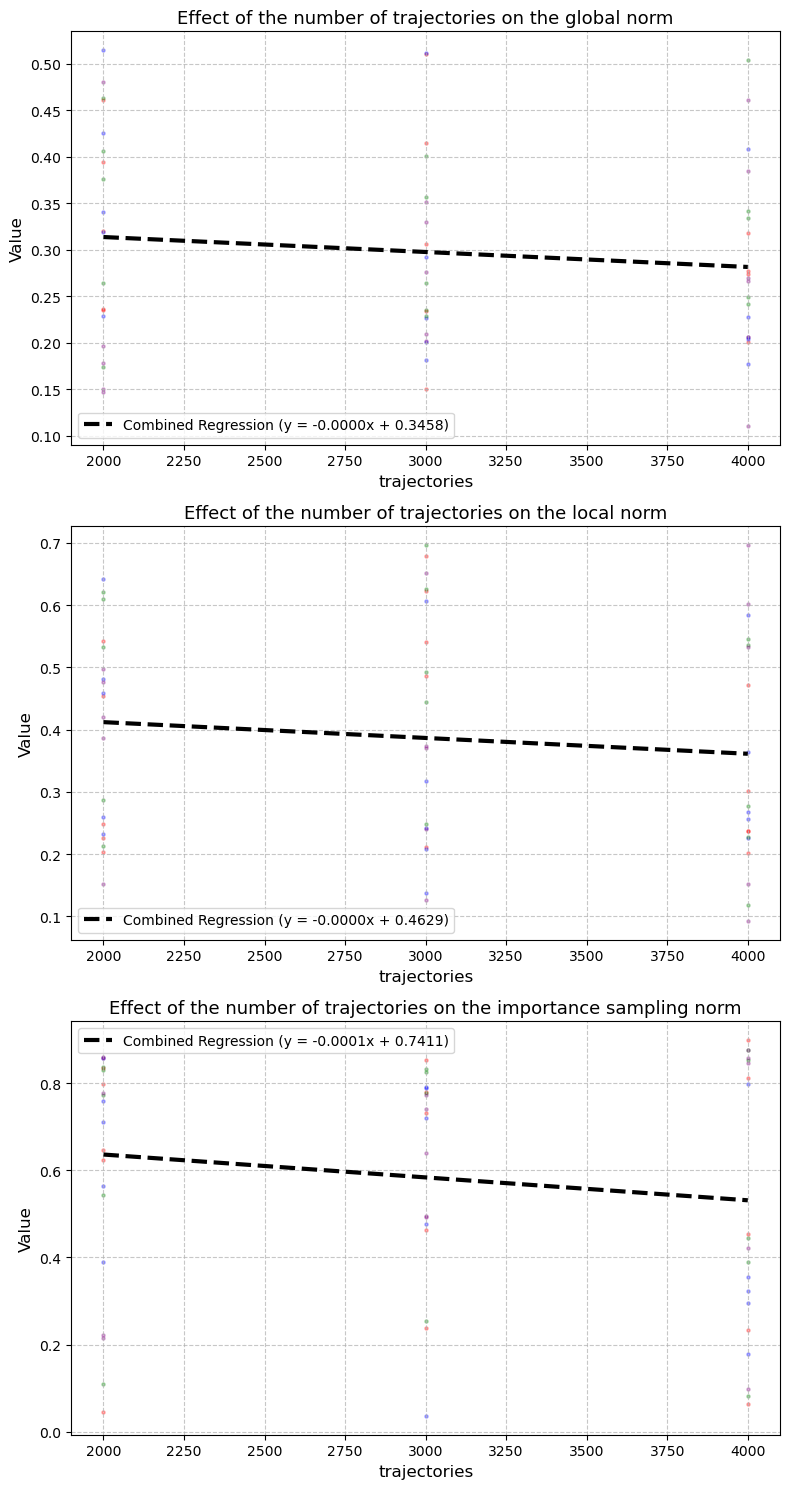

Regression Equation norm_global: y = 0.07635013262430823x + 0.22887498984734223
R² Score: 0.0026
Regression Equation norm_local: y = -0.046189670761426264x + 0.4281976117442051
R² Score: 0.0003
Regression Equation norm_imp: y = 0.8092961814254521x + -0.14474949985742547
R² Score: 0.0440


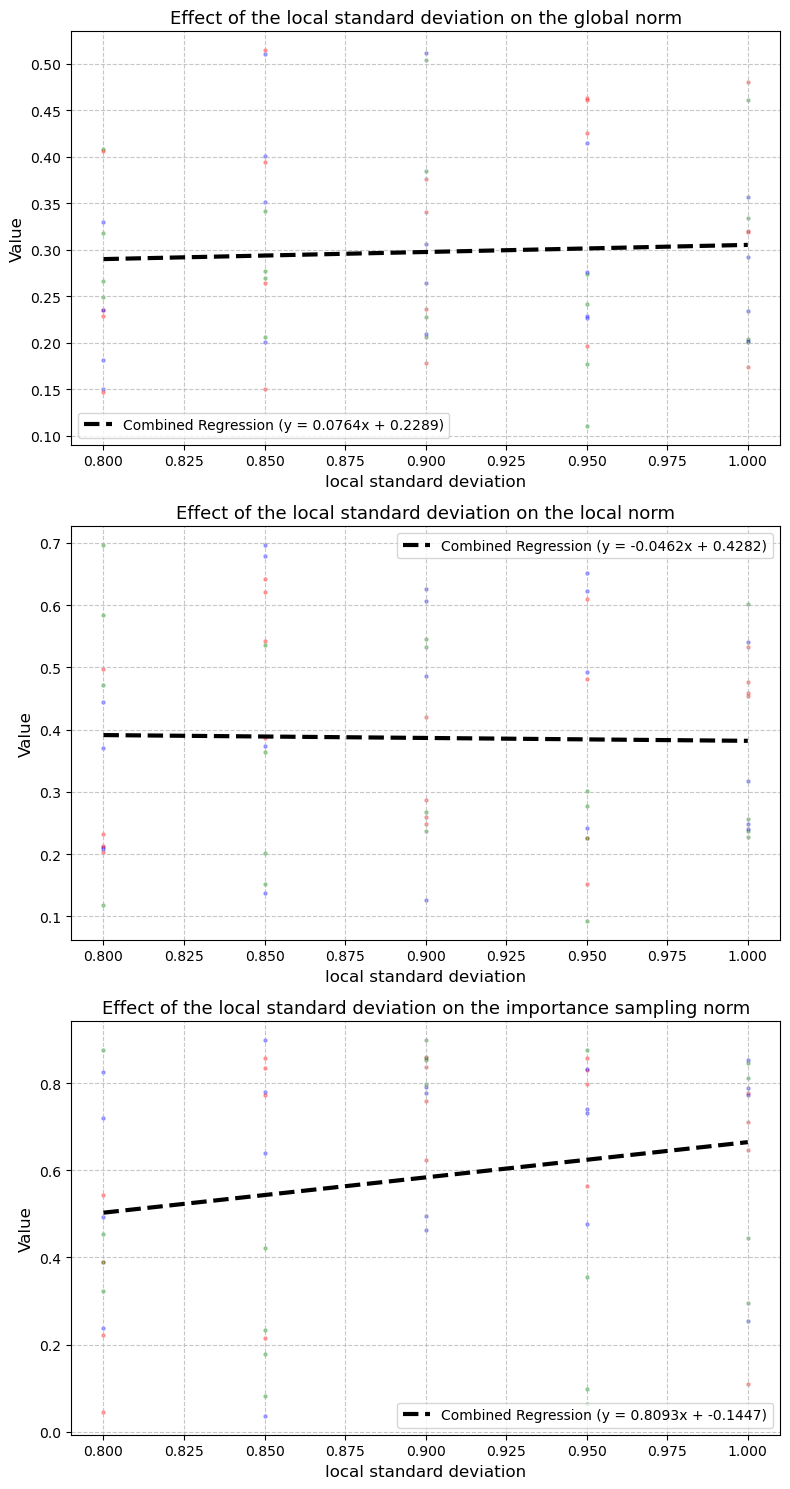

In [14]:
# Running the functions
for i in range(3):
    plotter(Distances_big, parameter_index=i, variable="Distances")
for i in range(3):
    plotter(Norms_big, parameter_index=i, variable="Norms")

In [21]:
# Loading the arrays back
Distances_New_formula = np.load('Distances_New_formula.npy', allow_pickle=True)
#Cos_distances = np.load('Cos_distances.npy', allow_pickle=True)
Norms_New_formula = np.load('Norms_New_formula.npy', allow_pickle=True)


x = [100, 300, 500, 700, 900]
y = [0.09926138818264008, 0.130279541015625, 0.12482261657714844, 0.21803268790245056, 0.053976863622665405]


x = [100, 300, 500, 700, 900]
y = [0.054245948791503906, 0.035282015800476074, 0.03605252504348755, 0.0687093734741211, 0.031378746032714844]


Regression Equation norm_global: y = 2.6297951303422452e-05x + 0.11396932065859439
R² Score: 0.0144
Regression Equation norm_local: y = 1.55590957403183e-05x + 0.05072343534231186
R² Score: 0.0026


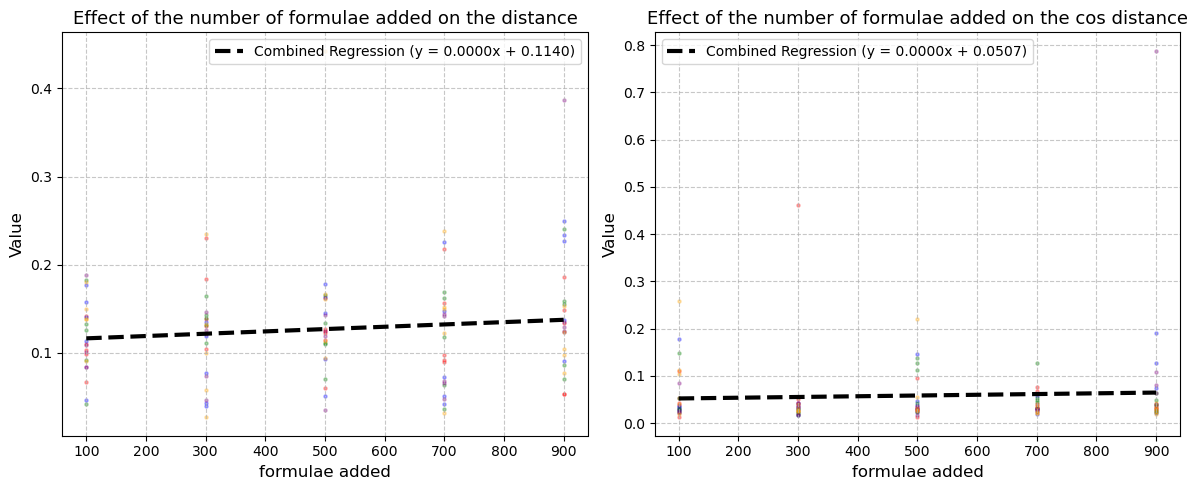

Regression Equation norm_global: y = 5.2567330002784725e-06x + 0.09557789830863478
R² Score: 0.0036
Regression Equation norm_local: y = 8.4467530250549e-08x + 0.05799617803096772
R² Score: 0.0000


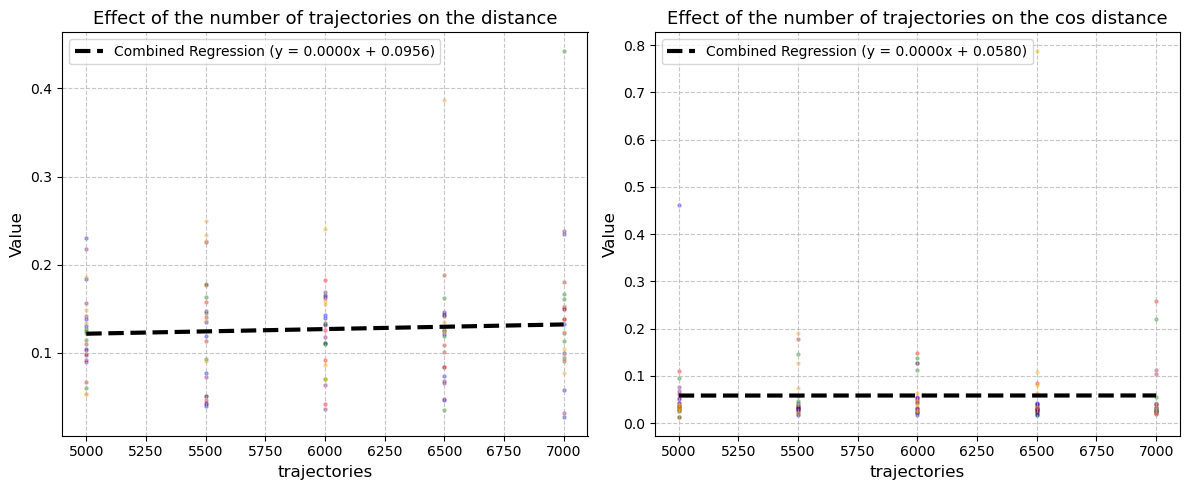

Regression Equation norm_global: y = 0.08746492236852632x + 0.04839986617863193
R² Score: 0.0099
Regression Equation norm_local: y = 0.0462034332752227x + 0.016919893264770586
R² Score: 0.0014


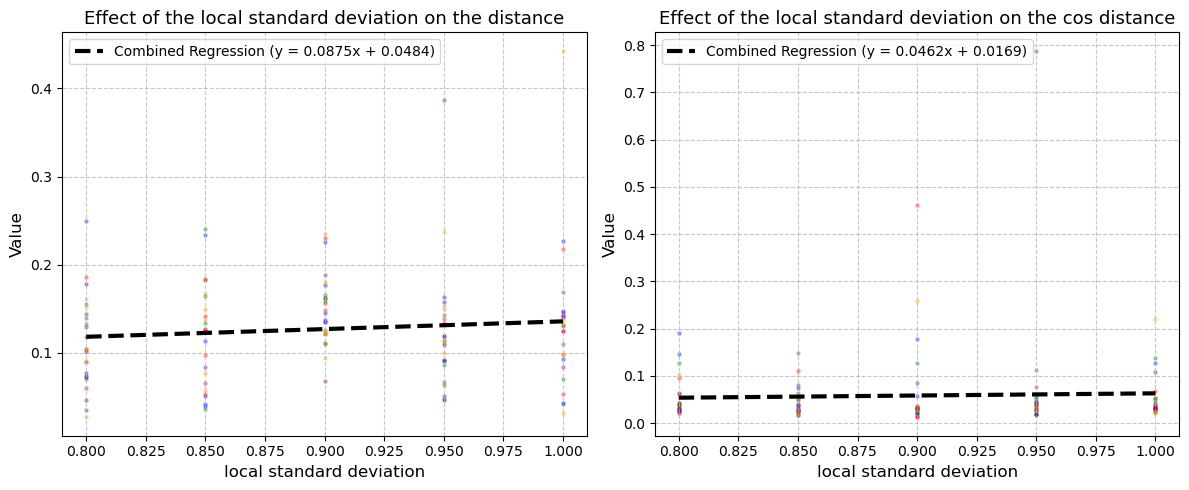

x = [100, 300, 500, 700, 900]
y = [0.3131764233112335, 0.20923767983913422, 0.3838748335838318, 0.3909275531768799, 0.17756043374538422]


x = [100, 300, 500, 700, 900]
y = [0.30341821908950806, 0.45674997568130493, 0.4663655757904053, 0.3392956852912903, 0.2016810029745102]


x = [100, 300, 500, 700, 900]
y = [0.29860708117485046, 0.39052143692970276, 0.46299871802330017, 0.4955987334251404, 0.21537403762340546]


Regression Equation norm_global: y = 9.337362647056563e-07x + 0.3069700991809368
R² Score: 0.0000
Regression Equation norm_local: y = 2.4267540574073792e-05x + 0.37924037206172945
R² Score: 0.0018
Regression Equation norm_imp: y = 1.8993762284517293e-05x + 0.3774024156183004
R² Score: 0.0011


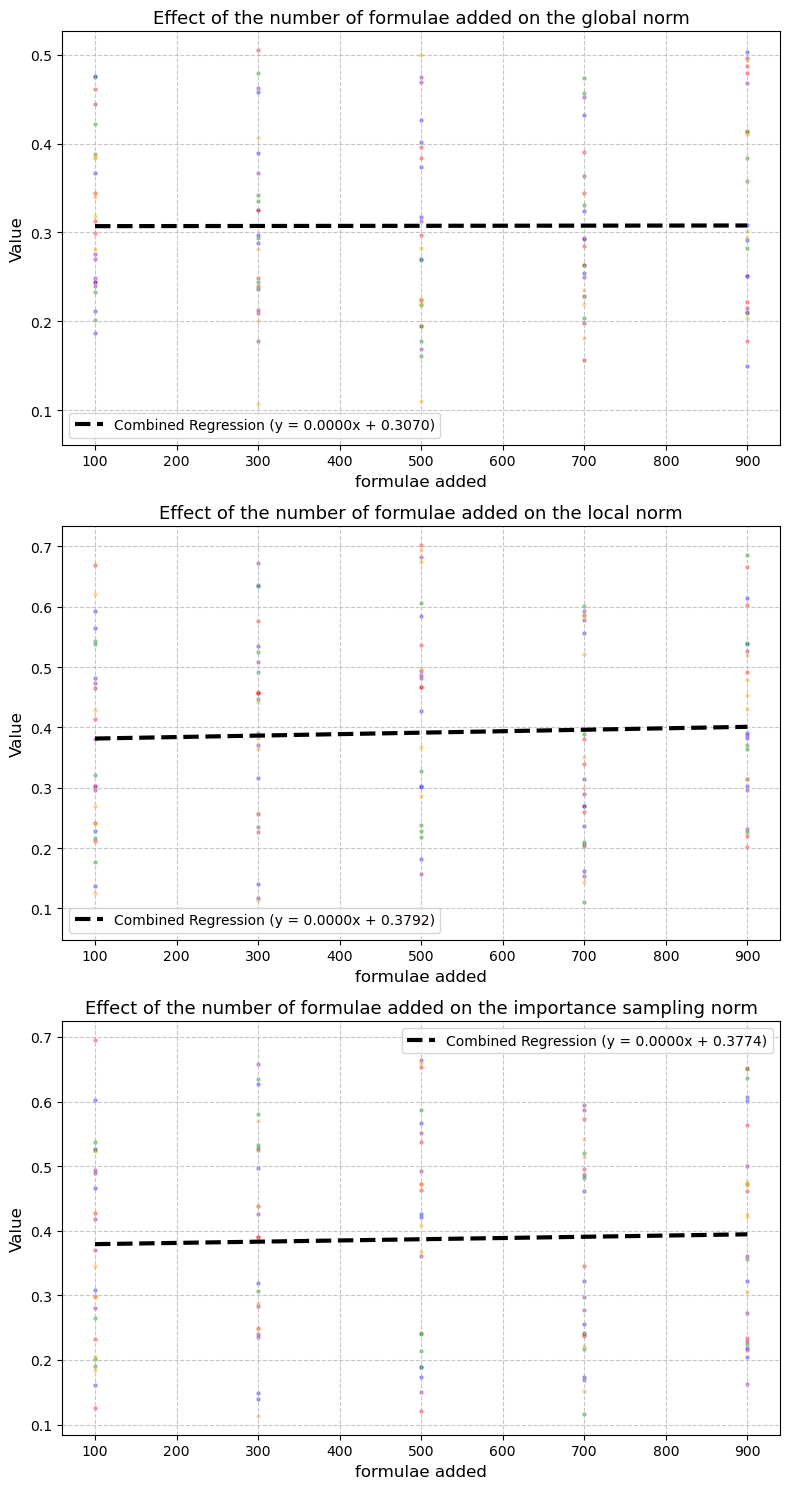

Regression Equation norm_global: y = -1.6320412397384643e-05x + 0.40535944169759747
R² Score: 0.0124
Regression Equation norm_local: y = -9.431025385856628e-07x + 0.3970327575802803
R² Score: 0.0000
Regression Equation norm_imp: y = -4.4858264923095945e-07x + 0.3895907926559448
R² Score: 0.0000


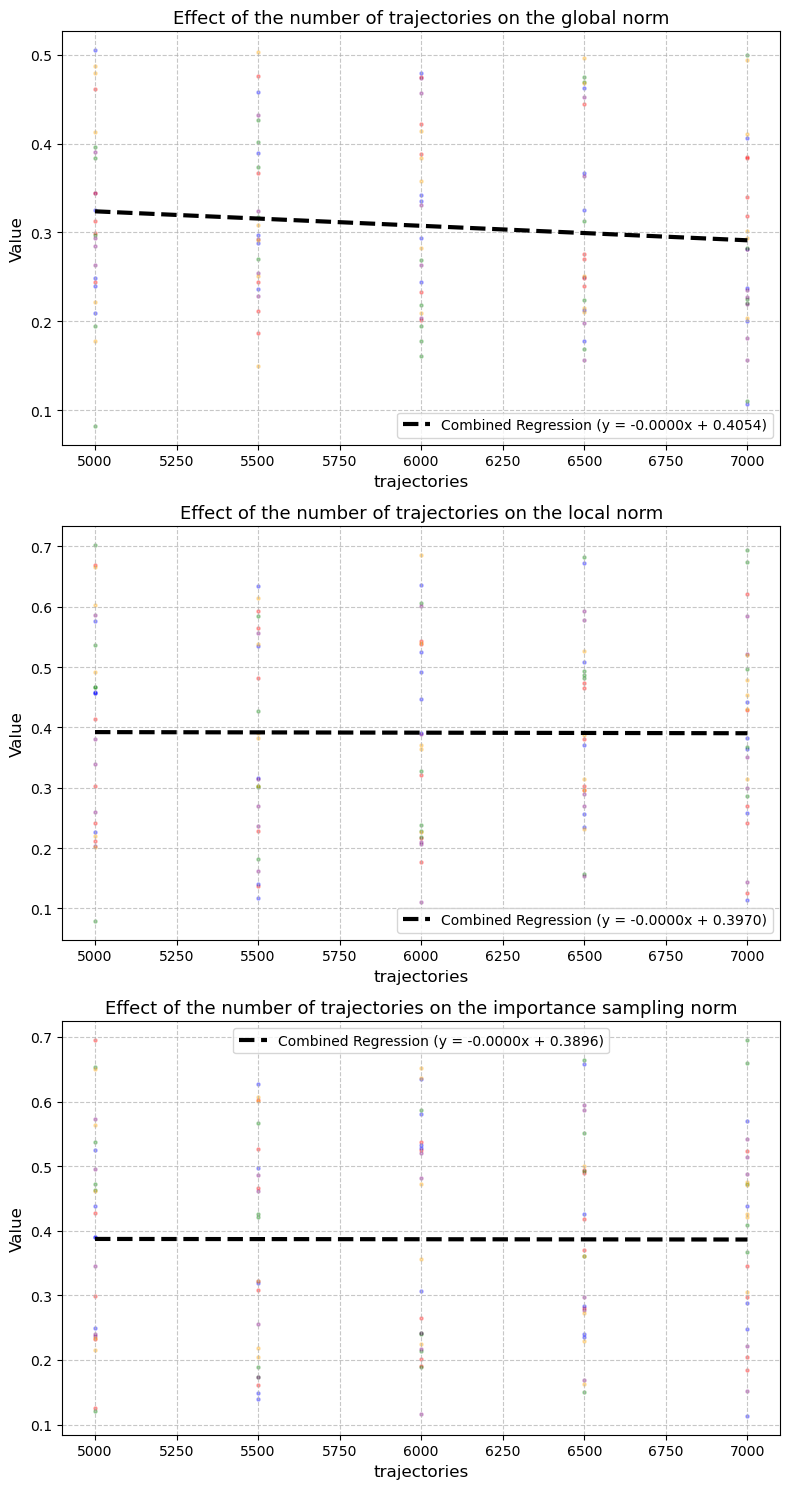

Regression Equation norm_global: y = 0.06826581180095662x + 0.2459977366924287
R² Score: 0.0022
Regression Equation norm_local: y = 0.10148471117019647x + 0.3000379022955895
R² Score: 0.0020
Regression Equation norm_imp: y = 0.12377365052700035x + 0.27550301128625876
R² Score: 0.0029


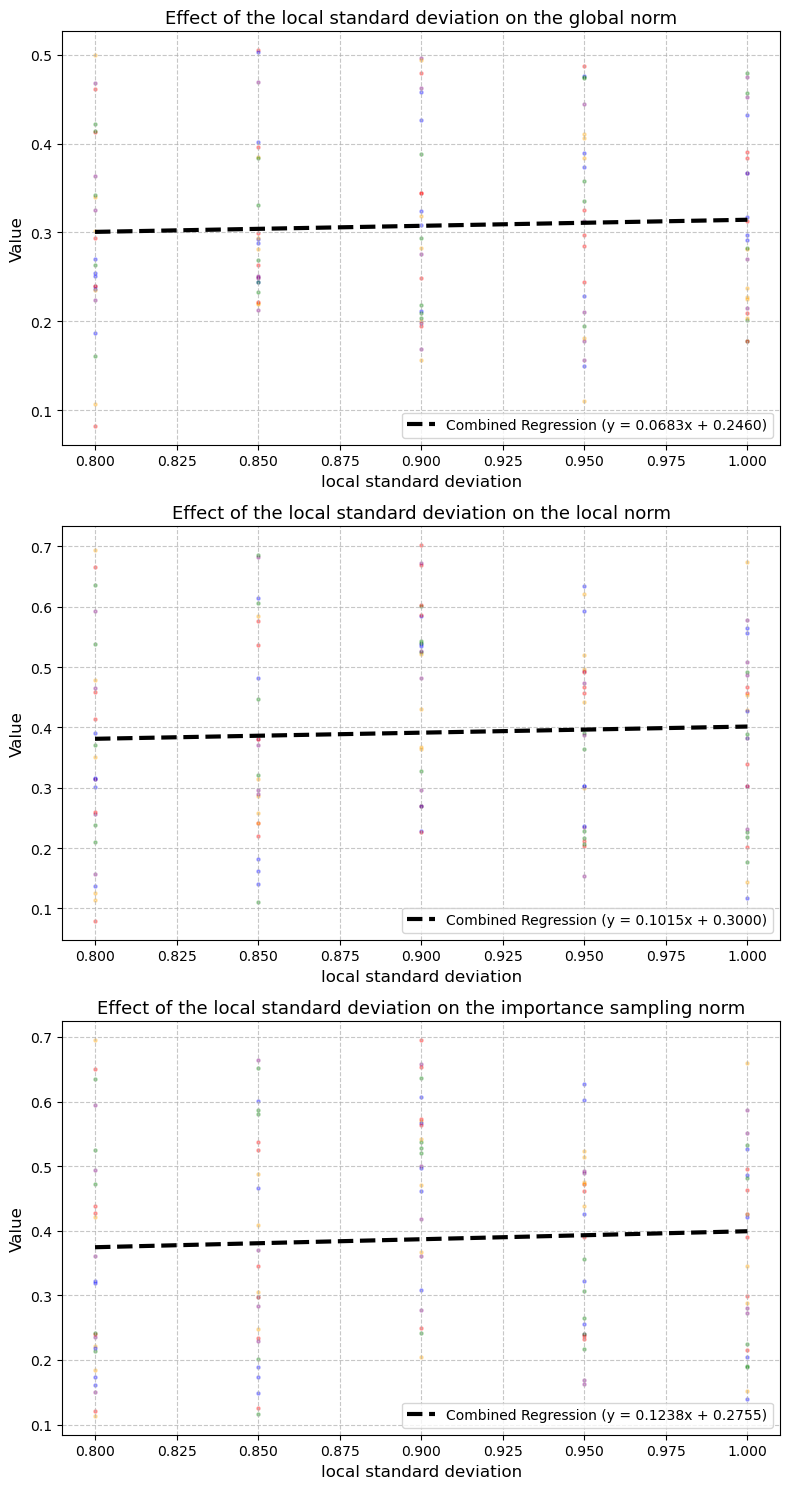

In [22]:
# Running the functions
for i in range(3):
    plotter(Distances_New_formula, parameter_index=i, variable="Distances")
for i in range(3):
    plotter(Norms_New_formula, parameter_index=i, variable="Norms")